# Кластеризація даних за допомогою метода k-means

## 1. Імпорт необхідних пакетів  

In [2]:
import sklearn as sk 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## 2. Імпорт набору даних для подальшої роботи

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 3. За допомогою ліктьового методу знаходимо оптимальну кількість скупчень

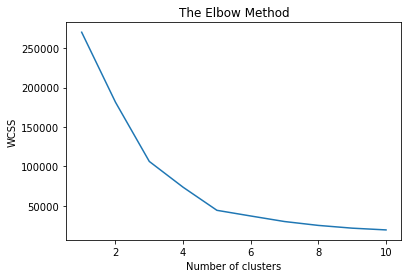

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 4. Навчання моделі K-Means на наборі даних

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## 5. Візуалізація кластерів

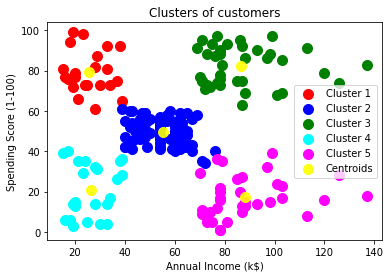

In [5]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, alpha = 0.9, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 5. Маштабування даних та повторна кластеризація

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(X)
X = sc.transform(X)
print(X)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


### Навчання моделі після маштабування

In [7]:
kmeans_scale = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_scale = kmeans_scale.fit_predict(X)

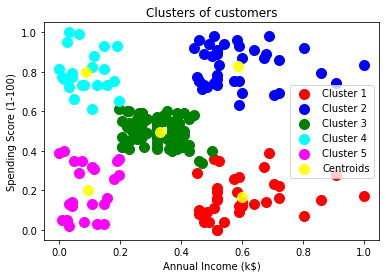

In [8]:
plt.scatter(X[y_kmeans_scale == 0, 0], X[y_kmeans_scale == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_scale == 1, 0], X[y_kmeans_scale == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_scale == 2, 0], X[y_kmeans_scale == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_scale == 3, 0], X[y_kmeans_scale == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_scale == 4, 0], X[y_kmeans_scale == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_scale.cluster_centers_[:, 0], kmeans_scale.cluster_centers_[:, 1], s = 100, alpha = 0.9, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()